# 2. CORE ANALYSIS

In [1]:
import pandas as pd

enrol_df = pd.read_csv("F:\\Data.Gov.in Hackthon\\outputs\\enrol_cleaned.csv")
demo_df  = pd.read_csv("F:\\Data.Gov.in Hackthon\\outputs\\demo_cleaned.csv")
bio_df   = pd.read_csv("F:\\Data.Gov.in Hackthon\\outputs\\bio_cleaned.csv")

In [2]:
enrol_df['total_enrolments'] = (
    enrol_df['age_0_5'] +
    enrol_df['age_5_17'] +
    enrol_df['age_18_greater']
)

# ANALYSIS 1: ENROLMENT GROWTH & SATURATION

## states with lowest growth

In [3]:
state_year_enrol = (
    enrol_df
    .groupby(['state', 'year'])['total_enrolments']
    .sum()
    .reset_index()
)

state_year_enrol['yoy_growth'] = (
    state_year_enrol
    .groupby('state')['total_enrolments']
    .pct_change()
)

In [4]:
state_year_enrol = state_year_enrol.drop(columns=['yoy_growth'])
state_year_enrol.head(10)

,state,year,total_enrolments
0,100000,2025,218
1,ANDAMAN & NICOBAR ISLANDS,2025,114
2,ANDAMAN AND NICOBAR ISLANDS,2025,397
3,ANDHRA PRADESH,2025,127686
4,ARUNACHAL PRADESH,2025,4344
5,ASSAM,2025,230197
6,BIHAR,2025,609585
7,CHANDIGARH,2025,2723
8,CHHATTISGARH,2025,103219
9,DADRA & NAGAR HAVELI,2025,25


# ANALYSIS 2: UPDATE BURDEN ANALYSIS

In [5]:
demo_df['total_demo_updates'] = (
    demo_df['age_5_17_updates'] +
    demo_df['age_17_plus_updates']
)

state_demo_updates = demo_df.groupby('state')['total_demo_updates'].sum()

state_enrolments = enrol_df.groupby('state')['total_enrolments'].sum()

update_burden = (
    state_demo_updates / state_enrolments
).reset_index(name='update_burden_ratio')

## Display top burden states

In [6]:
update_burden_sorted = update_burden.sort_values(
    'update_burden_ratio',
    ascending=False
)

update_burden_sorted.head(10)

,state,update_burden_ratio
14,DAMAN & DIU,30.666667
8,CHANDIGARH,30.613661
33,MANIPUR,22.410003
58,WESTBENGAL,21.714286
13,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,21.618497
10,CHHATTISGARH,19.428923
3,ANDHRA PRADESH,17.978337
55,WEST BANGAL,15.700000
2,ANDAMAN AND NICOBAR ISLANDS,15.584383
17,DELHI,15.222143


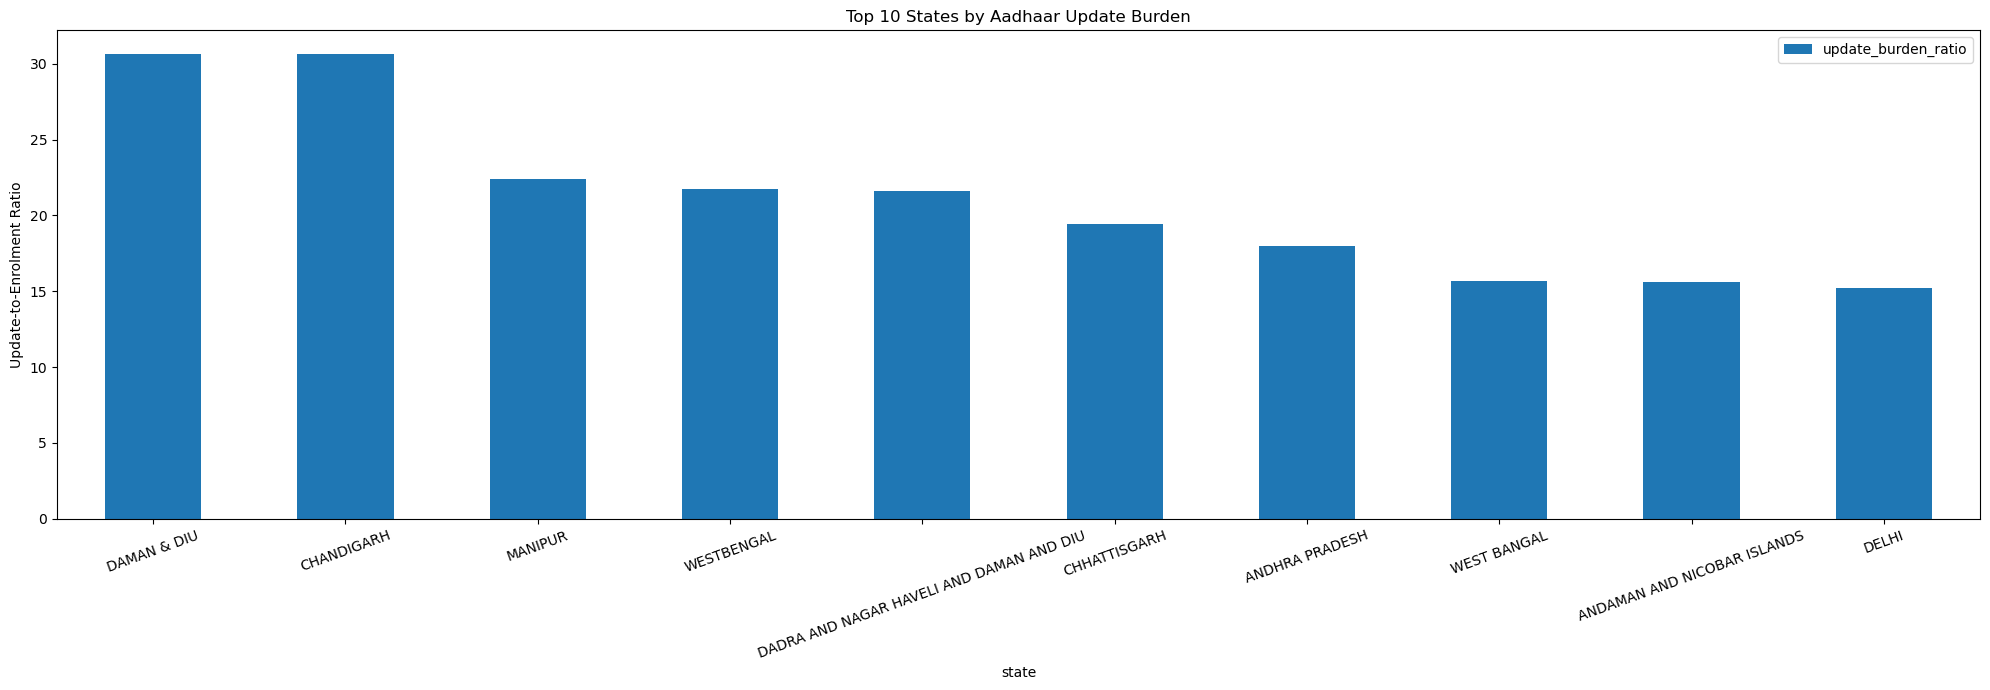

In [7]:
import matplotlib.pyplot as plt

update_burden_sorted.head(10).plot(
    x='state',
    y='update_burden_ratio',
    kind='bar',
    figsize=(20,7)
)

plt.title("Top 10 States by Aadhaar Update Burden")
plt.ylabel("Update-to-Enrolment Ratio")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Save for PDF

In [8]:
update_burden_sorted.to_csv(
    "F:\\Data.Gov.in Hackthon\\outputs\\tables\\update_burden_by_state.csv",
    index=False
)

# ANALYSIS 3: BIOMETRIC STRESS ANALYSIS

In [9]:
bio_df['total_bio_updates'] = (
    bio_df['age_5_17_updates'] +
    bio_df['age_17_plus_updates']
)

bio_state_stress = (
    bio_df
    .groupby('state')[[
        'age_5_17_updates',
        'age_17_plus_updates',
        'total_bio_updates'
    ]]
    .sum()
    .reset_index()
)

bio_state_stress['adult_share'] = (
    bio_state_stress['age_17_plus_updates'] /
    bio_state_stress['total_bio_updates']
)

In [10]:
bio_state_stress.sort_values(
    'adult_share',
    ascending=False
).head(10)

,state,age_5_17_updates,age_17_plus_updates,total_bio_updates,adult_share
45,UTTARANCHAL,0,2,2,1.000000
9,DADRA & NAGAR HAVELI,72,481,553,0.869801
0,ANDAMAN & NICOBAR ISLANDS,405,1979,2384,0.830117
34,PONDICHERRY,5218,22369,27587,0.810853
33,ORISSA,12796,49287,62083,0.793889
46,WEST BENGAL,6,22,28,0.785714
49,WESTBENGAL,7,24,31,0.774194
12,DAMAN & DIU,531,1654,2185,0.756979
19,JAMMU & KASHMIR,114,315,429,0.734266
47,WEST BANGAL,15,39,54,0.722222


In [11]:
bio_state_stress['stress_level'] = pd.cut(
    bio_state_stress['adult_share'],
    bins=[0, 0.6, 0.8, 1.0],
    labels=['Moderate', 'High', 'Critical']
)

bio_state_stress.head()

,state,age_5_17_updates,age_17_plus_updates,total_bio_updates,adult_share,stress_level
0,ANDAMAN & NICOBAR ISLANDS,405,1979,2384,0.830117,Critical
1,ANDAMAN AND NICOBAR ISLANDS,11401,6913,18314,0.377471,Moderate
2,ANDHRA PRADESH,2241467,1473166,3714633,0.396585,Moderate
3,ARUNACHAL PRADESH,42894,29500,72394,0.407492,Moderate
4,ASSAM,596624,386098,982722,0.392886,Moderate


# ANALYSIS 4: ANOMALY DETECTION

In [12]:
bio_df['z_score'] = (
    bio_df['total_bio_updates'] -
    bio_df['total_bio_updates'].mean()
) / bio_df['total_bio_updates'].std()

anomalies = bio_df[bio_df['z_score'].abs() > 3]

In [13]:
anomalies[['state', 'date', 'total_bio_updates', 'z_score']].head(10)

,state,date,total_bio_updates,z_score
0,HARYANA,01-03-2025,857,5.048446
2,JAMMU AND KASHMIR,01-03-2025,1734,10.451014
3,BIHAR,01-03-2025,1236,7.383193
4,TAMIL NADU,01-03-2025,1086,6.459151
5,MAHARASHTRA,01-03-2025,684,3.982717
15,BIHAR,01-03-2025,1384,8.294915
27,MAHARASHTRA,01-03-2025,807,4.740432
28,ODISHA,01-03-2025,1043,6.194258
30,KARNATAKA,01-03-2025,605,3.496055
31,GUJARAT,01-03-2025,910,5.374941


In [14]:
anomaly_count = anomalies.groupby('state').size().reset_index(name='anomaly_count')

anomaly_count.sort_values('anomaly_count', ascending=False)

,state,anomaly_count
28,UTTAR PRADESH,3785
17,MAHARASHTRA,3258
16,MADHYA PRADESH,2576
3,BIHAR,2338
9,GUJARAT,1290
24,RAJASTHAN,1277
25,TAMIL NADU,1197
0,ANDHRA PRADESH,1036
5,CHHATTISGARH,946
13,JHARKHAND,912


# ANALYSIS 5: PREDICTIVE DEMAND SIGNAL

## Compute monthly demand distribution

In [15]:
monthly_enrol = enrol_df.groupby('month')['total_enrolments'].sum().reset_index()

## Visualise seasonal pressure

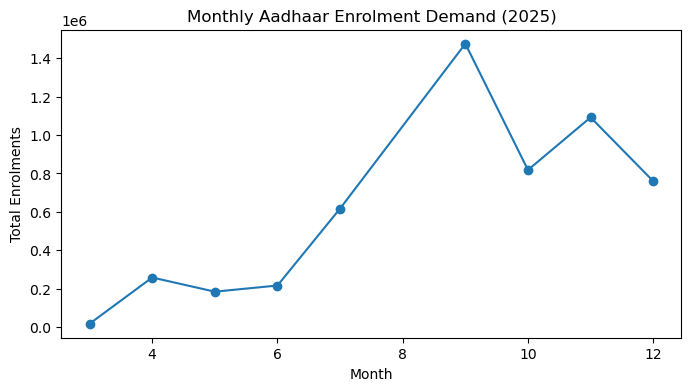

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(monthly_enrol['month'], monthly_enrol['total_enrolments'], marker='o')
plt.title("Monthly Aadhaar Enrolment Demand (2025)")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.show()

## Compute growth scenarios

In [17]:
base = enrol_df['total_enrolments'].sum()

scenario_projection = pd.DataFrame({
    "Scenario": ["Low growth (5%)", "Moderate growth (10%)", "High growth (15%)"],
    "Projected_Annual_Demand": [
        base * 1.05,
        base * 1.10,
        base * 1.15
    ]
})

scenario_projection

,Scenario,Projected_Annual_Demand
0,Low growth (5%),5707487.1
1,Moderate growth (10%),5979272.2
2,High growth (15%),6251057.3


# 1.DECISION INDICES

### INDEX 1: ENROLMENT SATURATION INDEX (ESI)

##### Step 1: Compute average YoY growth per state

In [18]:
state_enrol_comp = (
    enrol_df
    .groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .reset_index()
)

state_enrol_comp['adult_enrol_share'] = (
    state_enrol_comp['age_18_greater'] /
    (
        state_enrol_comp['age_0_5'] +
        state_enrol_comp['age_5_17'] +
        state_enrol_comp['age_18_greater']
    )
)

state_enrol_comp['enrolment_saturation_index'] = (
    (state_enrol_comp['adult_enrol_share'] - state_enrol_comp['adult_enrol_share'].min()) /
    (state_enrol_comp['adult_enrol_share'].max() - state_enrol_comp['adult_enrol_share'].min())
)

esi = state_enrol_comp[['state', 'enrolment_saturation_index']]
esi.head()

,state,enrolment_saturation_index
0,100000,1.000000
1,ANDAMAN & NICOBAR ISLANDS,0.000000
2,ANDAMAN AND NICOBAR ISLANDS,0.000000
3,ANDHRA PRADESH,0.011762
4,ARUNACHAL PRADESH,0.034921


##### Step 2: Normalize (0–1 scale)

In [19]:
esi = state_enrol_comp[['state', 'enrolment_saturation_index']].copy()
esi.head()

,state,enrolment_saturation_index
0,100000,1.000000
1,ANDAMAN & NICOBAR ISLANDS,0.000000
2,ANDAMAN AND NICOBAR ISLANDS,0.000000
3,ANDHRA PRADESH,0.011762
4,ARUNACHAL PRADESH,0.034921


### INDEX 2: UPDATE BURDEN SCORE (UBS)

##### Step 1: Normalize update burden

In [20]:
ubs = update_burden.copy()

ubs['update_burden_score'] = (
    (ubs['update_burden_ratio'] - ubs['update_burden_ratio'].min()) /
    (ubs['update_burden_ratio'].max() - ubs['update_burden_ratio'].min())
)

### INDEX 3: BIOMETRIC STRESS INDEX (BSI)

##### Step 1: Normalize adult share

In [21]:
bsi = bio_state_stress[['state', 'adult_share']].copy()

bsi['biometric_stress_index'] = (
    (bsi['adult_share'] - bsi['adult_share'].min()) /
    (bsi['adult_share'].max() - bsi['adult_share'].min())
)

# 2.BUILD COMPOSITE RISK SCORE

##### Step 1: Merge indices

In [22]:
decision_df = (
    esi[['state', 'enrolment_saturation_index']]
    .merge(ubs[['state', 'update_burden_score']], on='state')
    .merge(bsi[['state', 'biometric_stress_index']], on='state')
)

##### Step 2: Compute Composite Risk Score

In [23]:
decision_df['composite_risk_score'] = (
    0.4 * decision_df['enrolment_saturation_index'] +
    0.3 * decision_df['update_burden_score'] +
    0.3 * decision_df['biometric_stress_index']
)

##### Step 3: Rank states

In [24]:
STATE_NORMALIZATION = {
    "ANDAMAN & NICOBAR ISLANDS": "ANDAMAN AND NICOBAR ISLANDS",
    "DADRA & NAGAR HAVELI": "DADRA AND NAGAR HAVELI",
    "DAMAN & DIU": "DAMAN AND DIU",
    "JAMMU & KASHMIR": "JAMMU AND KASHMIR"
}

for df in [enrol_df, demo_df, bio_df]:
    df['state'] = df['state'].replace(STATE_NORMALIZATION)

In [25]:
state_enrol_comp = (
    enrol_df
    .groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .reset_index()
)

state_enrol_comp['adult_enrol_share'] = (
    state_enrol_comp['age_18_greater'] /
    (state_enrol_comp['age_0_5'] + state_enrol_comp['age_5_17'] + state_enrol_comp['age_18_greater'])
)

In [26]:
state_enrol_comp['enrolment_saturation_index'] = (
    (state_enrol_comp['adult_enrol_share'] - state_enrol_comp['adult_enrol_share'].min()) /
    (state_enrol_comp['adult_enrol_share'].max() - state_enrol_comp['adult_enrol_share'].min())
)

esi = state_enrol_comp[['state', 'enrolment_saturation_index']]

In [27]:
decision_df = (
    esi
    .merge(ubs[['state', 'update_burden_score']], on='state')
    .merge(bsi[['state', 'biometric_stress_index']], on='state')
)

In [28]:
decision_df['composite_risk_score'] = (
    0.4 * decision_df['enrolment_saturation_index'] +
    0.3 * decision_df['update_burden_score'] +
    0.3 * decision_df['biometric_stress_index']
)

decision_df['risk_rank'] = decision_df['composite_risk_score'].rank(ascending=False)

decision_df.sort_values('risk_rank').head(10)

,state,enrolment_saturation_index,update_burden_score,biometric_stress_index,composite_risk_score,risk_rank
8,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,0.121947,0.704863,0.702607,0.471019,1.0
42,WESTBENGAL,0.000000,0.707987,0.774194,0.444654,2.0
5,CHANDIGARH,0.013282,0.998271,0.339827,0.406742,3.0
6,CHHATTISGARH,0.019436,0.633442,0.666046,0.397621,4.0
40,WEST BANGAL,0.000000,0.511810,0.722222,0.370210,5.0
23,MANIPUR,0.019635,0.730680,0.410925,0.350336,6.0
10,DELHI,0.032414,0.496224,0.573556,0.333900,7.0
22,MAHARASHTRA,0.022341,0.446344,0.619265,0.328619,8.0
11,GOA,0.070189,0.490725,0.499335,0.325094,9.0
24,MEGHALAYA,0.322942,0.025665,0.583103,0.311807,10.0


# CHART 1: Top 10 States by Composite Risk

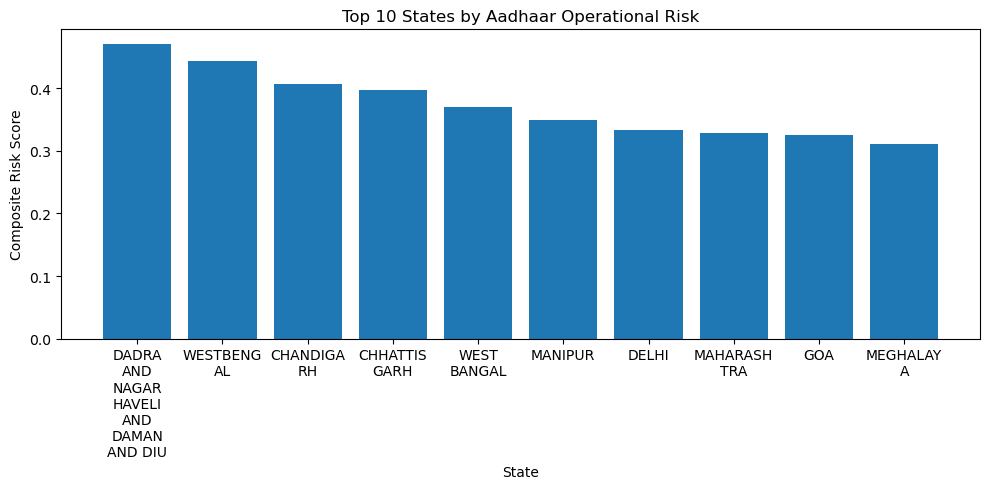

In [29]:
import matplotlib.pyplot as plt
import textwrap

top10 = decision_df.sort_values('risk_rank').head(10)

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top10['state'], top10['composite_risk_score'])

# Wrap long state names into 2–3 lines
wrapped_labels = [
    "\n".join(textwrap.wrap(state, width=8))
    for state in top10['state']
]

ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels, rotation=0)

plt.ylabel("Composite Risk Score")
plt.xlabel("State")
plt.title("Top 10 States by Aadhaar Operational Risk")
plt.tight_layout()
plt.show()

# CHART 2: Index Breakdown for High-Risk States

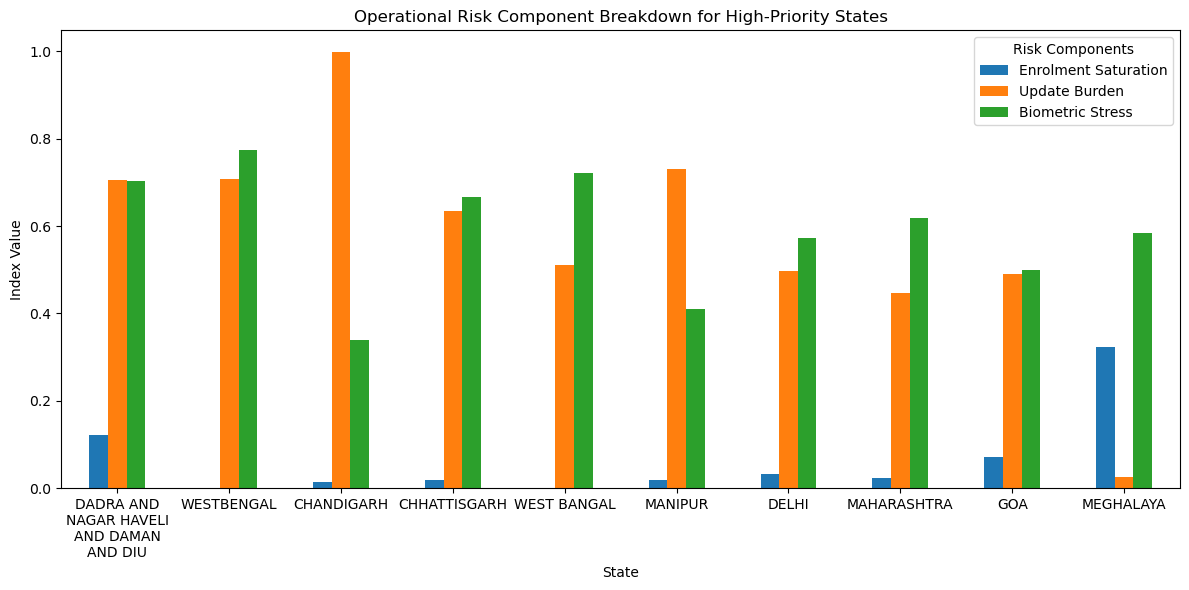

In [30]:
import matplotlib.pyplot as plt
import textwrap

top_states = top10['state']

ax = decision_df.set_index('state').loc[top_states][[
    'enrolment_saturation_index',
    'update_burden_score',
    'biometric_stress_index'
]].plot(
    kind='bar',
    figsize=(12,6)
)

# Wrap long state names into 2–3 lines
wrapped_labels = [
    "\n".join(textwrap.wrap(label.get_text(), width=12))
    for label in ax.get_xticklabels()
]

ax.set_xticklabels(wrapped_labels, rotation=0)

plt.title("Operational Risk Component Breakdown for High-Priority States")
plt.ylabel("Index Value")
plt.xlabel("State")
plt.legend(
    ["Enrolment Saturation", "Update Burden", "Biometric Stress"],
    title="Risk Components"
)
plt.tight_layout()
plt.show()

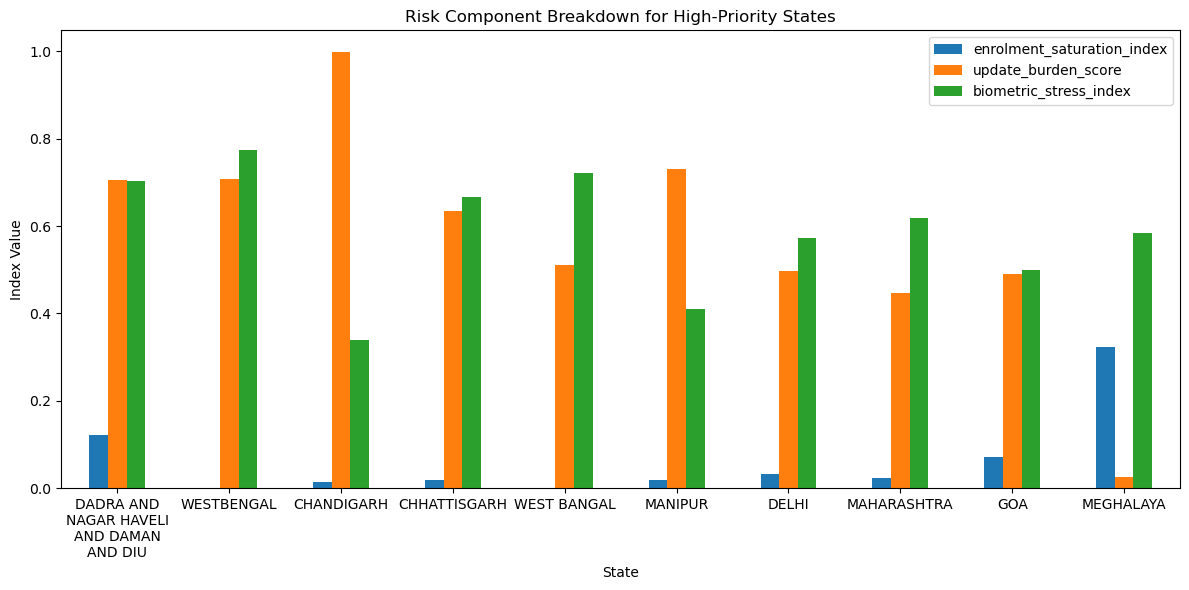

In [31]:
import matplotlib.pyplot as plt
import textwrap

top_states = top10['state']

ax = decision_df.set_index('state').loc[top_states][[
    'enrolment_saturation_index',
    'update_burden_score',
    'biometric_stress_index'
]].plot(kind='bar', figsize=(12,6))

wrapped_labels = [
    "\n".join(textwrap.wrap(label.get_text(), width=12))
    for label in ax.get_xticklabels()
]

ax.set_xticklabels(wrapped_labels, rotation=0)

plt.title("Risk Component Breakdown for High-Priority States")
plt.ylabel("Index Value")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# CHART 3: Update Burden - Top 10 States

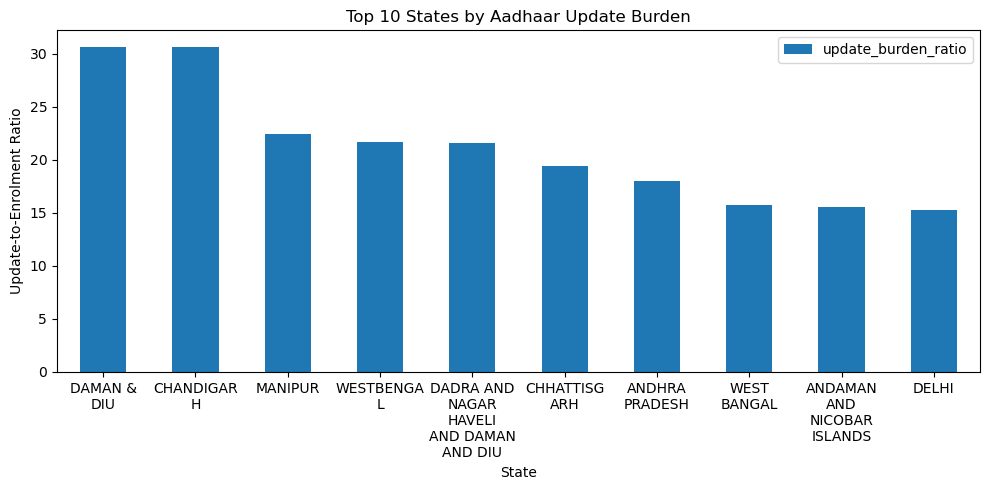

In [32]:
import matplotlib.pyplot as plt
import textwrap

ax = update_burden_sorted.head(10).plot(
    x='state',
    y='update_burden_ratio',
    kind='bar',
    figsize=(10,5)
)

wrapped_labels = [
    "\n".join(textwrap.wrap(label.get_text(), width=9))
    for label in ax.get_xticklabels()
]

ax.set_xticklabels(wrapped_labels, rotation=0)

plt.title("Top 10 States by Aadhaar Update Burden")
plt.ylabel("Update-to-Enrolment Ratio")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# CHART 4: Monthly Demand Pressure

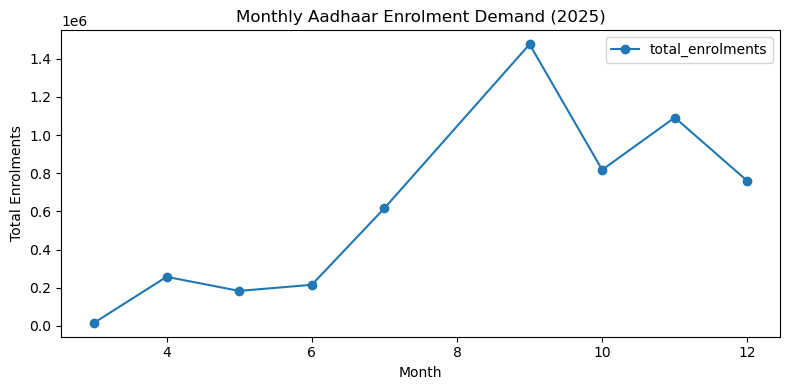

In [33]:
monthly_enrol.plot(
    x='month',
    y='total_enrolments',
    marker='o',
    figsize=(8,4)
)

plt.title("Monthly Aadhaar Enrolment Demand (2025)")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()

## Enrolment Saturation Analysis

In [34]:
state_enrol_comp = (
    enrol_df
    .groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .reset_index()
)

state_enrol_comp['adult_enrol_share'] = (
    state_enrol_comp['age_18_greater'] /
    (
        state_enrol_comp['age_0_5'] +
        state_enrol_comp['age_5_17'] +
        state_enrol_comp['age_18_greater']
    )
)

state_enrol_comp.head()

,state,age_0_5,age_5_17,age_18_greater,adult_enrol_share
0,100000,0,1,217,0.995413
1,ANDAMAN AND NICOBAR ISLANDS,479,32,0,0.000000
2,ANDHRA PRADESH,112445,13746,1495,0.011708
3,ARUNACHAL PRADESH,1957,2236,151,0.034761
4,ASSAM,141235,66085,22877,0.099380


In [35]:
state_enrol_comp['enrolment_saturation_index'] = (
    (state_enrol_comp['adult_enrol_share'] - state_enrol_comp['adult_enrol_share'].min()) /
    (state_enrol_comp['adult_enrol_share'].max() - state_enrol_comp['adult_enrol_share'].min())
)

state_enrol_comp.sort_values(
    'enrolment_saturation_index',
    ascending=False
).head(10)

,state,age_0_5,age_5_17,age_18_greater,adult_enrol_share,enrolment_saturation_index
0,100000,0,1,217,0.995413,1.000000
25,MEGHALAYA,21179,53305,35287,0.321460,0.322942
9,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,131,21,21,0.121387,0.121947
4,ASSAM,141235,66085,22877,0.099380,0.099838
26,MIZORAM,4136,1295,495,0.083530,0.083915
27,NAGALAND,4512,9953,1122,0.071983,0.072315
12,GOA,1916,254,163,0.069867,0.070189
13,GUJARAT,193031,71182,16336,0.058229,0.058497
34,SIKKIM,1054,1047,106,0.048029,0.048250
18,KARNATAKA,179262,33863,10110,0.045289,0.045497


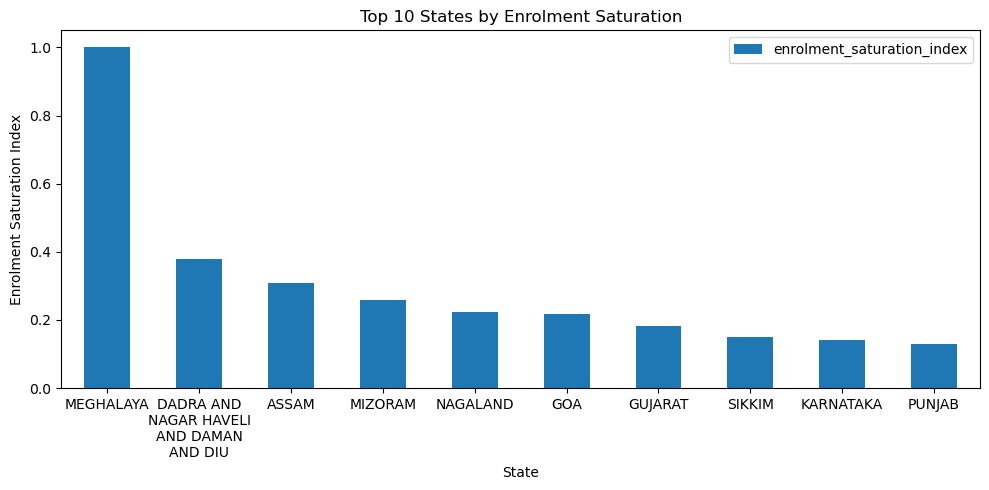

In [36]:
import matplotlib.pyplot as plt
import textwrap
import pandas as pd

enrol_df = enrol_df[
    enrol_df['state'].notna() &
    enrol_df['state'].apply(lambda x: isinstance(x, str))
]

enrol_df = enrol_df[~enrol_df['state'].str.fullmatch(r'\d+')]
state_enrol_comp = (
    enrol_df
    .groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .reset_index()
)

state_enrol_comp['adult_enrol_share'] = (
    state_enrol_comp['age_18_greater'] /
    (
        state_enrol_comp['age_0_5'] +
        state_enrol_comp['age_5_17'] +
        state_enrol_comp['age_18_greater']
    )
)

state_enrol_comp['enrolment_saturation_index'] = (
    (state_enrol_comp['adult_enrol_share'] - state_enrol_comp['adult_enrol_share'].min()) /
    (state_enrol_comp['adult_enrol_share'].max() - state_enrol_comp['adult_enrol_share'].min())
)
ax = state_enrol_comp.sort_values(
    'enrolment_saturation_index',
    ascending=False
).head(10).plot(
    x='state',
    y='enrolment_saturation_index',
    kind='bar',
    figsize=(10,5)
)

wrapped_labels = [
    "\n".join(textwrap.wrap(label.get_text(), width=12))
    for label in ax.get_xticklabels()
]

ax.set_xticklabels(wrapped_labels, rotation=0)

plt.title("Top 10 States by Enrolment Saturation")
plt.ylabel("Enrolment Saturation Index")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# Biometric Stress Analysis

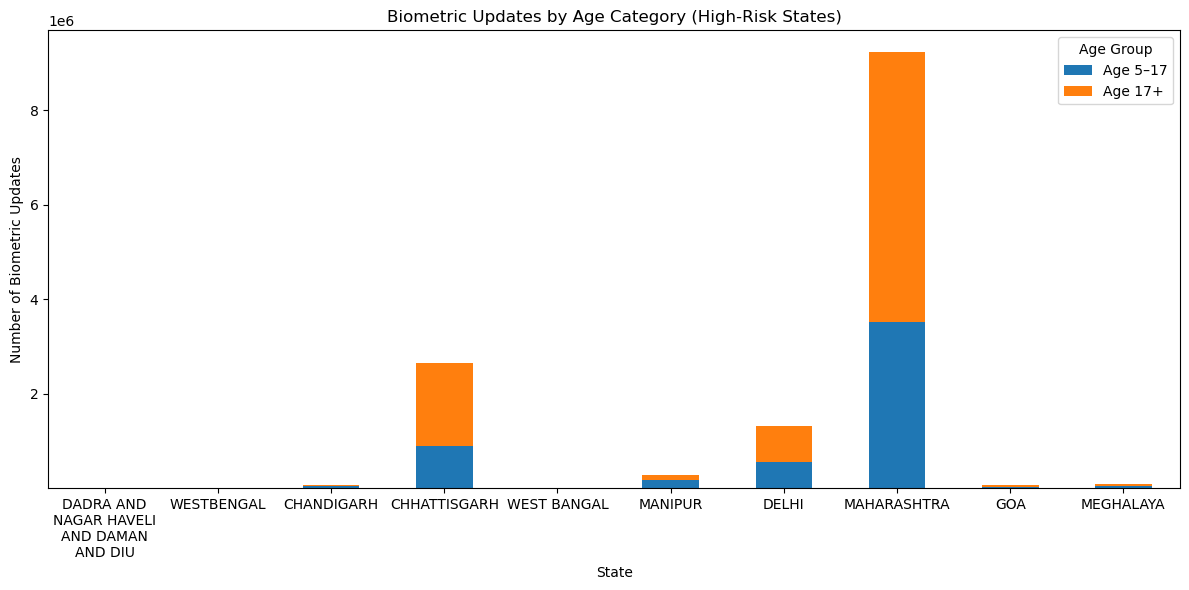

In [37]:
import matplotlib.pyplot as plt
import textwrap

high_risk_states = top10['state']

ax = bio_state_stress.set_index('state').loc[high_risk_states][
    ['age_5_17_updates', 'age_17_plus_updates']
].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

wrapped_labels = [
    "\n".join(textwrap.wrap(label.get_text(), width=12))
    for label in ax.get_xticklabels()
]

ax.set_xticklabels(wrapped_labels, rotation=0)

plt.title("Biometric Updates by Age Category (High-Risk States)")
plt.ylabel("Number of Biometric Updates")
plt.xlabel("State")
plt.legend(["Age 5–17", "Age 17+"], title="Age Group")
plt.tight_layout()
plt.show()

# Distribution of States by Aadhaar Operational Risk

In [38]:
import pandas as pd
decision_df['risk_bucket'] = pd.qcut(
    decision_df['composite_risk_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

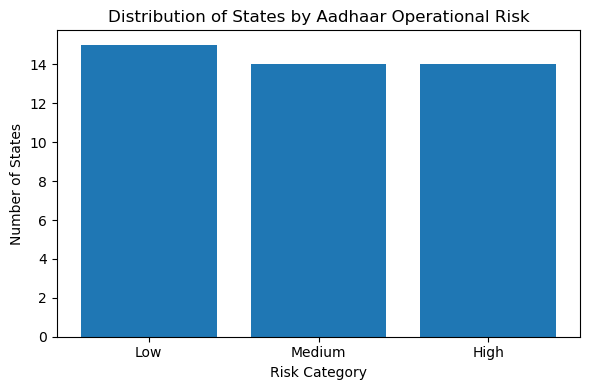

In [39]:
import matplotlib.pyplot as plt

risk_counts = decision_df['risk_bucket'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(
    risk_counts.index,
    risk_counts.values
)

plt.title("Distribution of States by Aadhaar Operational Risk")
plt.xlabel("Risk Category")
plt.ylabel("Number of States")
plt.tight_layout()
plt.show()

In [40]:
risk_counts.reset_index().rename(
    columns={'index': 'Risk Category', 'risk_bucket': 'Number of States'}
)

,Number of States,count
0,Low,15
1,Medium,14
2,High,14
